In [2]:
import os
import pandas as pd
import statistics

data_dir = r'LinkedIn Data Public'
graph = {}

def get_name(row):
    try:
        full_name = f"{row['First Name'].strip()} {row['Last Name'].strip()}"
        return full_name.replace(".csv", "")
    except:
        return None
    
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
print(f"\n🔍 Total CSV files found: {len(csv_files)}\n{'-'*40}")

# Process each file
for idx, file in enumerate(csv_files, start=1):
    student = file.split(" - ")[0].replace("_", " ").strip()
    if student == "Connections":
        student = file.split("-")[1].strip().replace(".csv","")

    student.replace(".csv", "")
    path = os.path.join(data_dir, file)

    try:
        try:
            df = pd.read_csv(path, encoding='utf-8', on_bad_lines='skip')
        except UnicodeDecodeError:
            df = pd.read_csv(path, encoding='ISO-8859-1', on_bad_lines='skip')

        if not {'First Name', 'Last Name'}.issubset(df.columns):
            print(f"Skipping (missing columns): {file}")
            continue

        df.dropna(subset=['First Name', 'Last Name'], inplace=True)

        # print(f"[{idx}/{len(csv_files)}] Processed: {file} | Connections: {len(df)}")

        # Ensure the student node exists in the graph
        if student not in graph:
            graph[student] = []

        # Extract all names as list (preserving duplicates)
        raw_connections = [get_name(row) for _, row in df.iterrows()]
        graph[student] = raw_connections

        for name in raw_connections:
            # Add node if not exists
            if name not in graph:
                graph[name] = []

            # Add edge (undirected, unique)
            # if name not in graph[student]:
            if student not in graph[name]:
                graph[name].append(student)

    except Exception as e:
        print(f"❌ Error in {file}: {e}")

# Summary
print(f"\n📊 Summary")
print(f"{'-'*40}")
print(f"Total unique people (nodes): {len(graph)}")
print(f"Total edges (unique connections): {sum(len(friends) for friends in graph.values()) // 2}")

# Sample node degrees
print(f"\n👥 Sample Connections")
print(f"{'-'*40}")


sample = list(graph.items())[:10]
for person, contacts in sample:
    print(f"{person:<25} → {len(contacts)} connections")



🔍 Total CSV files found: 127
----------------------------------------

📊 Summary
----------------------------------------
Total unique people (nodes): 29356
Total edges (unique connections): 105316

👥 Sample Connections
----------------------------------------
Aaditya Raj               → 293 connections
Harsh Kumar Singh         → 4 connections
Saurabh Singh             → 79 connections
Anamika Kumari            → 929 connections
Hariom Parmar             → 80 connections
sukhe...⁰ 🩺               → 34 connections
Mani Kumar                → 58 connections
Himanshu Srivastav        → 485 connections
Mudasir Ahmad             → 7 connections
Ayush Katiyar             → 2 connections


In [3]:
# Calculate the degree (number of connections) for each student
degrees = {student: len(connections) for student, connections in graph.items()}

# Sort degrees in descending order to get the top most connected students
sorted_degrees = dict(sorted(degrees.items(), key=lambda item: item[1], reverse=True))

top = []
print("Top 10 most connected people:")
for name, degree in list(sorted_degrees.items())[:10]:
    print(f"{name}: {degree} connections")
    top.append(name)

# Calculate the mean number of connections
mean_connections = statistics.mean(degrees.values())

print(f"\nMean number of connections: {mean_connections:.2f}")


Top 10 most connected people:
Rohit Malviya: 4626 connections
Ravi Rajput: 4293 connections
Manoj Dewda: 4212 connections
Ramraj Nagar: 3913 connections
Nirmal LinkdIn Connections: 3750 connections
Pranjal Dubey: 3560 connections
Challa Trivedh Kumar: 3016 connections
Himanshu kumar: 2907 connections
Neeraj Parmar: 2809 connections
Aman Singh: 2790 connections

Mean number of connections: 7.18


In [4]:
for node,num in degrees.items():
    if num==0:
        print(node,":",num,"connections")
else:
    print("No nodes with 0 connections")

No nodes with 0 connections


In [5]:
from collections import defaultdict

data_dir = r'LinkedIn Data Public'
company_graph = defaultdict(list)

def get_name(row):
    try:
        return f"{row['First Name'].strip()} {row['Last Name'].strip()}"
    except:
        return None

csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

print(f"\n🔍 Total CSV files found: {len(csv_files)}\n{'-'*40}")

for idx, file in enumerate(csv_files, start=1):
    path = os.path.join(data_dir, file)

    try:
        try:
            df = pd.read_csv(path, encoding='utf-8', on_bad_lines='skip')
        except UnicodeDecodeError:
            df = pd.read_csv(path, encoding='ISO-8859-1', on_bad_lines='skip')

        if not {'First Name', 'Last Name'}.issubset(df.columns):
            print(f"⚠️ Skipping (missing columns): {file}")
            continue

        df.dropna(subset=['First Name', 'Last Name'], inplace=True)

        for _, row in df.iterrows():
            name = get_name(row)
            if not name:
                continue

            company = row.get('Company', 'Student')

            if pd.isna(company) or str(company).strip().lower() in {'none', 'nan', ''}:
                company = 'Student'
            else:
                company = str(company).strip()

            company_graph[company].append(name)


    except Exception as e:
        print(f"❌ Error in {file}: {e}")

# Final cleanup: remove duplicates
for company in company_graph:
    company_graph[company] = sorted(set(company_graph[company]))

print(f"Total unique companies: {len(company_graph)}")





🔍 Total CSV files found: 127
----------------------------------------
Total unique companies: 12364


In [6]:
# Assuming company_graph is already built

# Get top N companies by number of people
top_n  = 15
top_companies = sorted(company_graph.items(), key=lambda x: len(x[1]), reverse=True)[:top_n]
tot = 0
print(f"\n🏆 Top {top_n} Companies by Connections")
print(f"{'-'*40}")
for i, (company, people) in enumerate(top_companies, start=1):
    print(f"{i}. {company} → {len(people)} people")



🏆 Top 15 Companies by Connections
----------------------------------------
1. Student → 7763 people
2. Google → 391 people
3. Amazon → 297 people
4. HCLTech → 265 people
5. Microsoft → 221 people
6. Tata Consultancy Services → 216 people
7. Walmart Global Tech India → 154 people
8. Oracle → 127 people
9. Goldman Sachs → 115 people
10. Freelance → 114 people
11. Accenture → 110 people
12. Self-employed → 100 people
13. GirlScript Summer of Code → 99 people
14. Dell Technologies → 98 people
15. IBM → 89 people


In [7]:
company_graph["Sitare University"]

['ANSHU _',
 'Akshat Trivedi',
 'Amit Singhal',
 'Ashwini Singh, Ph.D.',
 'Devyansh Banwari',
 'Dheerendra Mishra',
 'Gajanand Mourya (Graphite Pencil Professional)',
 'Manu Kumar',
 'Mayank Singh Tomar',
 'Pintu Lohar, PhD',
 'Preeti Shukla',
 'Rajat Singh',
 'Ram Bhanwar Bhadiyar',
 'Saurabh Pandey',
 'Shankho Subhra Pal',
 'Siddhant Gupta',
 'Suresh Singh Panwar',
 'Yash Chittora']

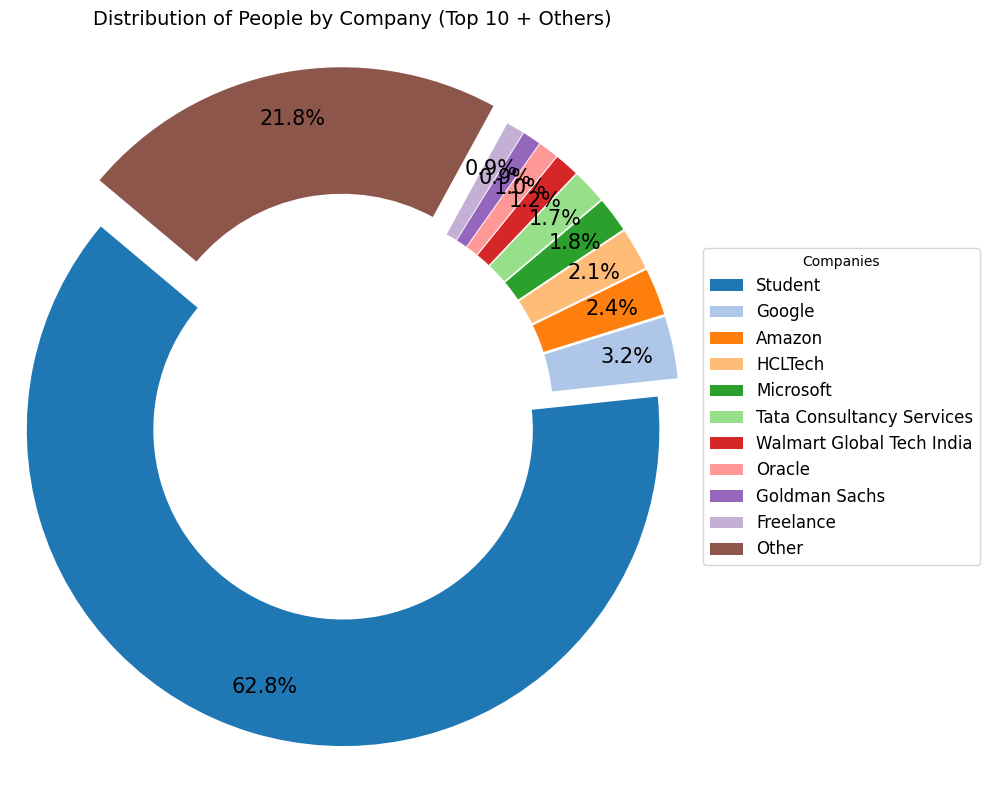

In [8]:
import matplotlib.pyplot as plt

# Data
top_companies = {
    'Student': 7763,
    'Google': 391,
    'Amazon': 297,
    'HCLTech': 265,
    'Microsoft': 221,
    'Tata Consultancy Services': 216,
    'Walmart Global Tech India': 154,
    'Oracle': 127,
    'Goldman Sachs': 115,
    'Freelance': 114
}

total_companies = 12364
top_count = sum(top_companies.values())
other_count = total_companies - top_count
top_companies['Other'] = other_count

# Prepare data
labels = list(top_companies.keys())
sizes = list(top_companies.values())
explode = [0.05] * 10 + [0.1]  # Slightly highlight all top, more for 'Other'
colors = plt.cm.tab20.colors  # Use a colormap

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    pctdistance=0.85,  # Move percentage labels outward
    wedgeprops=dict(width=0.4),  # Donut style
    textprops={'fontsize': 15, 'color': 'black'}
)

# Add legend outside
ax.legend(
    wedges,
    labels,
    title="Companies",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize='large'
)

plt.title("Distribution of People by Company (Top 10 + Others)", fontsize=14)
plt.axis('equal')  # Keep the chart circular
plt.tight_layout()
plt.show()


In [9]:
other_count

2701

In [8]:
import random
import statistics
from collections import Counter



# ------------- RANDOM WALK FUNCTION -----------------
def random_walk(graph, start, end, max_steps=29000):
    walk = [start]
    current = start

    for _ in range(max_steps):
        if current == end:
            return walk
        neighbors = list(graph.get(current, []))
        if not neighbors:
            return None  # Dead end
        next_node = random.choice(neighbors)
        walk.append(next_node)
        current = next_node

    return None  # Max steps exceeded

# ------------- PRUNE TO SIMPLE PATH -----------------
def prune_path(walk):
    if not walk:
        return None, 0

    seen = {}
    pruned = []
    loop_count = 0
    for node in walk:
        if node in seen:
            loop_start = seen[node]
            pruned = pruned[:loop_start + 1]
            loop_count += 1
        else:
            seen[node] = len(pruned)
            pruned.append(node)
    return pruned, loop_count


# ------------- STATS COLLECTION -----------------
def run_statistics(graph, num_samples=100):
    all_nodes = [node for node in graph if graph[node]]
    if len(all_nodes) < 2:
        print("Not enough connected nodes to sample from.")
        return

    random.seed()
    walk_lengths = []
    pruned_lengths = []
    loop_counts = []
    successful_pairs = 0
    pairs = []

    node_visit_counts = Counter()

    for _ in range(num_samples):
        start, end = random.sample(all_nodes, 2)
        walk = random_walk(graph, start, end)

        if walk and walk[-1] == end:
            pruned, loops = prune_path(walk)
            if pruned:
                walk_lengths.append(len(walk))
                pruned_lengths.append(len(pruned))
                loop_counts.append(loops)
                pairs.append((start, end))
                successful_pairs += 1

                node_visit_counts.update(walk)
    common_nodes = [node for node, count in node_visit_counts.items() if count == successful_pairs]

    # ----------- SUMMARY OUTPUT ----------------
    print("-" * 40)
    print("RANDOM WALK STATISTICS SUMMARY")
    print("-" * 40)

    if successful_pairs == 0:
        print("No successful walks reached the destination.")
        return

    success_rate = (successful_pairs / num_samples) * 100
    efficiencies = [(p / w)*100 for p, w in zip(pruned_lengths, walk_lengths)]

    longest_index = walk_lengths.index(max(walk_lengths))
    shortest_index = pruned_lengths.index(min(pruned_lengths))

    print(f"Successful walks           : {successful_pairs}/{num_samples}")
    print(f"Success rate               : {success_rate:.2f}%")
    print()
    print(f"Average walk length        : {statistics.mean(walk_lengths):.2f}")
    print(f"Average pruned path length : {statistics.mean(pruned_lengths):.2f}")
    print(f"Minimum pruned path length : {min(pruned_lengths)}")
    print(f"Maximum pruned path length : {max(pruned_lengths)}")
    print(f"Maximum walk length        : {max(walk_lengths)}")
    print()
    print(f"Average loops removed      : {statistics.mean(loop_counts):.2f}")
    print(f"Maximum loops removed      : {max(loop_counts)}")
    print(f"Average pruning efficiency : {statistics.mean(efficiencies):.2f} (pruned/walk)")
    print()
    print(f"Longest walk pair          : {pairs[longest_index]} with length {walk_lengths[longest_index]}")
    print(f"Shortest pruned path pair  : {pairs[shortest_index]} with length {pruned_lengths[shortest_index]}")
    print(f"Number of Nodes visited in ALL successful walks: {len(common_nodes) ,common_nodes}")
    print("-" * 40)

n = 1000

print(f"\n--- Running with {n} samples ---")
run_statistics(graph, num_samples=n)




--- Running with 1000 samples ---
----------------------------------------
RANDOM WALK STATISTICS SUMMARY
----------------------------------------
Successful walks           : 239/1000
Success rate               : 23.90%

Average walk length        : 12704.17
Average pruned path length : 7.42
Minimum pruned path length : 3
Maximum pruned path length : 18
Maximum walk length        : 28823

Average loops removed      : 8914.97
Maximum loops removed      : 21490
Average pruning efficiency : 0.39 (pruned/walk)

Longest walk pair          : ('Shivangi Tripathi', 'Samar Pratap Yadav') with length 28823
Shortest pruned path pair  : ('Akash Zalke', 'Nikhil Bisen') with length 3
Number of Nodes visited in ALL successful walks: (3, ['Aditya Purohit', 'Israr Ahmed', 'SRIJAN PRATAP SINGH'])
----------------------------------------


In [10]:
walk = random_walk(graph, "Suyash Yadav", "Shlok Gupta")
if walk:
    pruned = prune_path(walk)[0]
else:
    print("No walk found between the nodes.")

print(walk)
print("Walk Length:" ,len(walk))
print(pruned)
print("Pruned path length",len(pruned))

NameError: name 'random_walk' is not defined

In [ ]:
from collections import deque

def is_connected(graph):
    if not graph:
        return True  # An empty graph is trivially connected

    visited = set()
    start_node = next(iter(graph))  # Start from any one node
    queue = deque([start_node])

    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.add(node)
            queue.extend(set(graph[node]) - visited)

    return len(visited) == len(graph)

connected = is_connected(graph)
print("Graph is connected" if connected else "Graph is not connected")



Graph is connected


In [44]:
from collections import defaultdict

def get_spanning_tree(graph):
    visited = set()
    spanning_tree = defaultdict(set)

    def dfs(node):
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                spanning_tree[node].add(neighbor)
                spanning_tree[neighbor].add(node)
                dfs(neighbor)

    # Start from any node
    start_node = next(iter(graph))
    dfs(start_node)
    return spanning_tree

spanning = get_spanning_tree(graph)

print(f"Spanning Tree has {len(spanning)} nodes and {sum(len(v) for v in spanning.values()) // 2} edges")


Spanning Tree has 29356 nodes and 29355 edges


In [50]:

original_nodes = len(graph)
original_edges = sum(len(neighbors) for neighbors in graph.values()) // 2

spanning_nodes = len(spanning)
spanning_edges = sum(len(neighbors) for neighbors in spanning.values()) // 2

edges_removed = original_edges - spanning_edges

print(f"Original graph: {original_nodes} nodes, {original_edges} edges")
print(f"Spanning tree: {spanning_nodes} nodes, {spanning_edges} edges")
print(f"🔻 Edges removed to get spanning tree: {edges_removed}")


Original graph: 29356 nodes, 105316 edges
Spanning tree: 29356 nodes, 29355 edges
🔻 Edges removed to get spanning tree: 75961


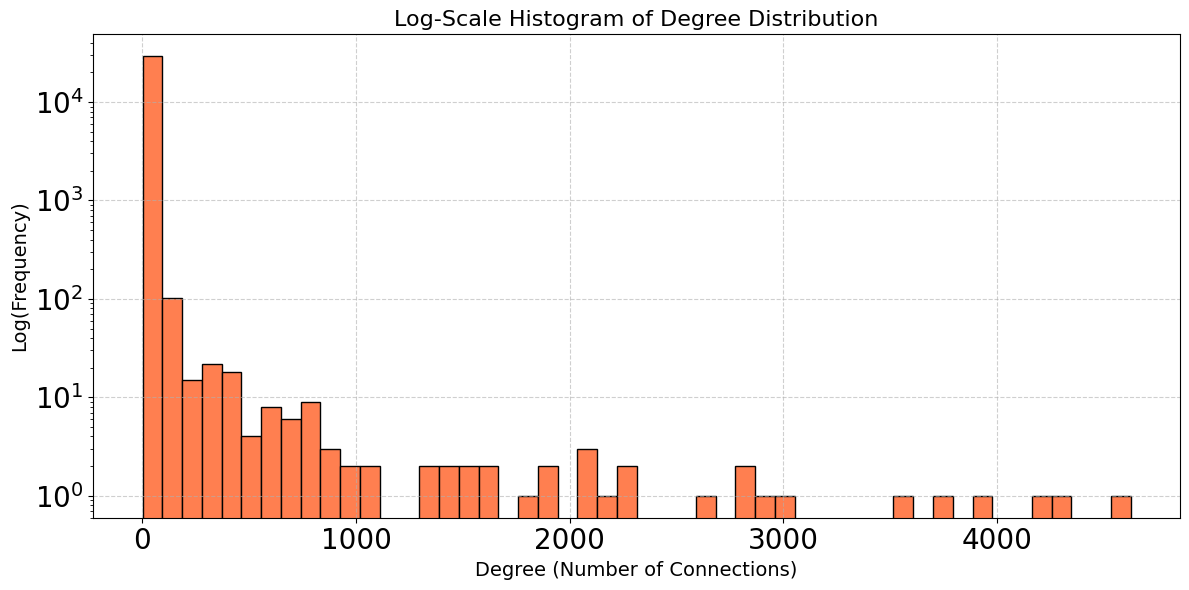

In [49]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(df_degrees['Degree'], bins=50, color='coral', edgecolor='black', log=True)

plt.title('Log-Scale Histogram of Degree Distribution', fontsize=16)
plt.xlabel('Degree (Number of Connections)', fontsize=14)
plt.ylabel('Log(Frequency)', fontsize=14)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
